In [121]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [122]:
# Load the data
obesity = pd.read_csv("obesity_data_set.csv")

### Explore data

In [123]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [124]:
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [125]:
obesity.describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


In [126]:
obesity.isnull().value_counts()

Gender  Age    Height  Weight  family_history_with_overweight  FAVC   FCVC   NCP    CAEC   SMOKE  CH2O   SCC    FAF    TUE    CALC   MTRANS  NObeyesdad
False   False  False   False   False                           False  False  False  False  False  False  False  False  False  False  False   False         2111
dtype: int64

Without NaN values, we can use LabelEncoder

In [127]:
from sklearn.preprocessing import LabelEncoder

# create encoder
encoder = LabelEncoder()

# create new variable with assigned numbers
obesity['CAEC'] = encoder.fit_transform(obesity['CAEC'])
obesity['CALC'] = encoder.fit_transform(obesity['CALC'])
obesity['Gender'] = encoder.fit_transform(obesity['Gender'])
obesity['family_history_with_overweight'] = encoder.fit_transform(obesity['family_history_with_overweight'])
obesity['FAVC'] = encoder.fit_transform(obesity['FAVC'])
obesity['SMOKE'] = encoder.fit_transform(obesity['SMOKE'])
obesity['SCC'] = encoder.fit_transform(obesity['SCC'])

In [128]:
obesity.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,Public_Transportation,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,Public_Transportation,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,Public_Transportation,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,Walking,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,Public_Transportation,Overweight_Level_II
5,1,29.0,1.62,53.0,0,1,2.0,3.0,2,0,2.0,0,0.0,0.0,2,Automobile,Normal_Weight
6,0,23.0,1.50,55.0,1,1,3.0,3.0,2,0,2.0,0,1.0,0.0,2,Motorbike,Normal_Weight
7,1,22.0,1.64,53.0,0,0,2.0,3.0,2,0,2.0,0,3.0,0.0,2,Public_Transportation,Normal_Weight
8,1,24.0,1.78,64.0,1,1,3.0,3.0,2,0,2.0,0,1.0,1.0,1,Public_Transportation,Normal_Weight
9,1,22.0,1.72,68.0,1,1,2.0,3.0,2,0,2.0,0,1.0,1.0,3,Public_Transportation,Normal_Weight


For MTRANS, let´s make an onehot encoder method, cause it is important to know what kind of transport people use (or not)

In [129]:
transport = pd.get_dummies(obesity['MTRANS'], prefix='', prefix_sep='')
obesity = obesity.join(transport)
obesity = obesity.drop(columns='MTRANS')

In [130]:
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,...,0,0.0,1.0,3,Normal_Weight,0,0,0,1,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,...,1,3.0,0.0,2,Normal_Weight,0,0,0,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,...,0,2.0,1.0,1,Normal_Weight,0,0,0,1,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,...,0,2.0,0.0,1,Overweight_Level_I,0,0,0,0,1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,...,0,0.0,0.0,2,Overweight_Level_II,0,0,0,1,0


For NObeyesdad (the outcome) is important to know if a person is obese or not. Let´s map the values for our analysis

In [131]:
mapping = {'Insufficient_Weight': 0, 
           'Normal_Weight': 0, 
           'Overweight_Level_I': 0, 
           'Overweight_Level_II': 0,
            'Obesity_Type_I': 1, 
            'Obesity_Type_II': 1, 
            'Obesity_Type_III': 1}

In [132]:
obesity['NObeyesdad'] = obesity['NObeyesdad'].map(mapping)

In [133]:
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,...,0,0.0,1.0,3,0,0,0,0,1,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,...,1,3.0,0.0,2,0,0,0,0,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,...,0,2.0,1.0,1,0,0,0,0,1,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,...,0,2.0,0.0,1,0,0,0,0,0,1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,...,0,0.0,0.0,2,0,0,0,0,1,0


### Split the data into X and y

In [134]:
# predictors
X = obesity.drop(['NObeyesdad'], axis=1)

# outcome
y = obesity['NObeyesdad']

### Logistic Regression model

In [135]:
lr = LogisticRegression(max_iter=1000)

lr.fit(X, y)

# Accuracy score
lr.score(X, y)

0.9658929417337755

### Sequential Forward Selection

In [137]:
sfs = SFS(lr,
          k_features=9,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=0)

In [138]:
sfs.fit(X,y)

# Inspect the results of sequential forward selection
sfs.subsets_[9]

{'feature_idx': (0, 1, 2, 3, 4, 6, 8, 13, 15),
 'cv_scores': array([0.97347229]),
 'avg_score': 0.9734722880151587,
 'feature_names': ('Gender',
  'Age',
  'Height',
  'Weight',
  'family_history_with_overweight',
  'FCVC',
  'CAEC',
  'TUE',
  'Automobile')}

In [139]:
# feature names
sfs.subsets_[9]['feature_names']

('Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FCVC',
 'CAEC',
 'TUE',
 'Automobile')

In [140]:
# feature average score
sfs.subsets_[9]['avg_score']

0.9734722880151587

Visualize model accuracy

/home/cacaprog/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/cacaprog/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


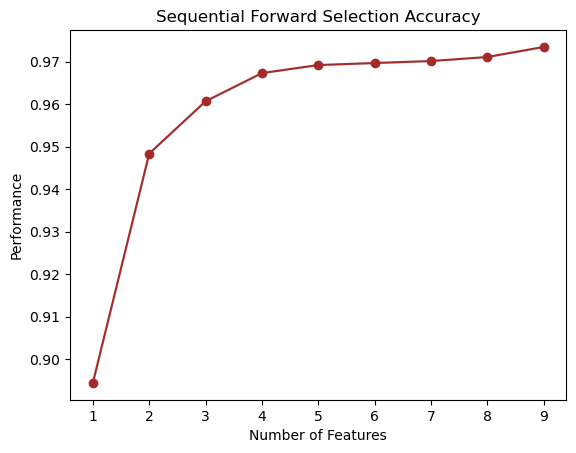

In [151]:
plot_sfs(sfs.get_metric_dict(), color='brown', marker='o')
plt.title('Sequential Forward Selection Accuracy')
plt.show()

### Sequential Backward Selection

In [155]:
sbs = SFS(lr,
          k_features=7,
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=0)

In [156]:
sbs.fit(X,y)

sbs.subsets_[7]

/home/cacaprog/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'feature_idx': (0, 1, 2, 3, 4, 13, 15),
 'cv_scores': array([0.97347229]),
 'avg_score': 0.9734722880151587,
 'feature_names': ('Gender',
  'Age',
  'Height',
  'Weight',
  'family_history_with_overweight',
  'TUE',
  'Automobile')}

In [157]:
sbs.subsets_[7]['avg_score']

0.9734722880151587

Visualize model accuracy

/home/cacaprog/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/cacaprog/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


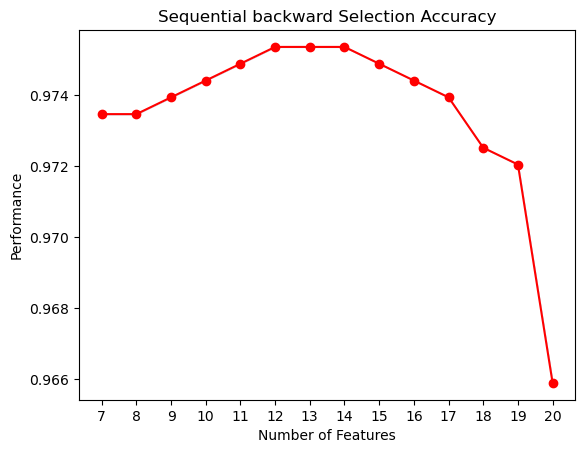

In [159]:
plot_sfs(sbs.get_metric_dict(), color='red')
plt.title('Sequential backward Selection Accuracy')
plt.show()

### Recursive Feature Elimination

In [160]:
features = X.columns

Standardize the data

In [162]:
X = pd.DataFrame(StandardScaler().fit_transform(X))

Fit the model

In [164]:
rfe = RFE(estimator=lr,
          n_features_to_select=6)

rfe.fit(X,y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=6)

Inspect chosen features

In [166]:
rfe_features = [f for (f, support) in zip(features, rfe.support_) if support]
rfe_features

['Gender', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'SCC']

In [167]:
rfe.score(X,y)

0.9966840360018948

In [168]:
rfe.get_params()

{'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 1000,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(max_iter=1000),
 'importance_getter': 'auto',
 'n_features_to_select': 6,
 'step': 1,
 'verbose': 0}